In [15]:
import numpy as np
block_length = 1000000
snr_db = np.arange(1,15,1)
ber_results = []
for snr_db_value in snr_db:
    sys = 2*(np.random.randint(0,2,block_length)-0.5)
    snr = 10**(snr_db_value*0.1)
    noise = np.random.normal(0,1,block_length)

    transmitted_bits = sys*(np.sqrt(snr))
    received_bits = transmitted_bits + noise
    decoded_bits = 2*(received_bits>0) -1

    bit_errors = np.sum(decoded_bits != sys)
    ber = bit_errors / block_length
    ber_results.append(ber)

for snr_db_value, ber in zip(snr_db, ber_results):
    print(f"SNR (dB): {snr_db_value}, Bit Error Rate: {ber:.4f}")


SNR (dB): 1, Bit Error Rate: 0.1310
SNR (dB): 2, Bit Error Rate: 0.1042
SNR (dB): 3, Bit Error Rate: 0.0791
SNR (dB): 4, Bit Error Rate: 0.0567
SNR (dB): 5, Bit Error Rate: 0.0375
SNR (dB): 6, Bit Error Rate: 0.0232
SNR (dB): 7, Bit Error Rate: 0.0128
SNR (dB): 8, Bit Error Rate: 0.0060
SNR (dB): 9, Bit Error Rate: 0.0023
SNR (dB): 10, Bit Error Rate: 0.0008
SNR (dB): 11, Bit Error Rate: 0.0002
SNR (dB): 12, Bit Error Rate: 0.0000
SNR (dB): 13, Bit Error Rate: 0.0000
SNR (dB): 14, Bit Error Rate: 0.0000


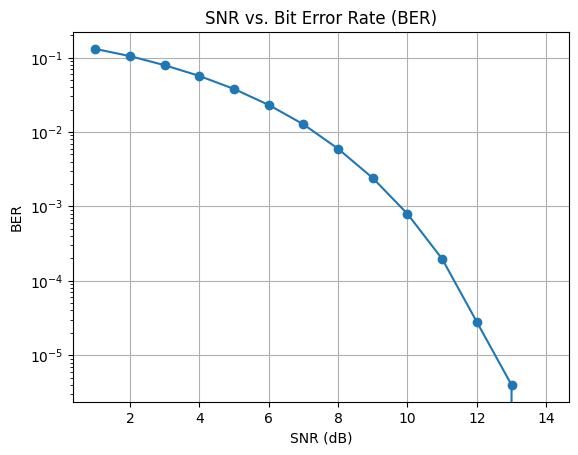

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.semilogy(snr_db, ber_results, marker='o', linestyle='-')
plt.title('SNR vs. Bit Error Rate (BER)')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
plt.show()

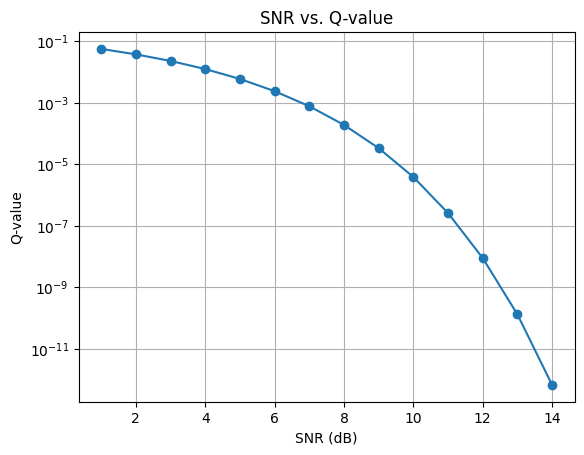

In [17]:
# Using the q value

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

snr_db = np.arange(1, 15, 1)
q_values = []

for snr_db_value in snr_db:
    snr = 10 ** (snr_db_value * 0.1)
    q = 1 - norm.cdf(np.sqrt(2*snr))
    q_values.append(q)

plt.figure()
plt.semilogy(snr_db, q_values, marker='o', linestyle='-')
plt.title('SNR vs. Q-value')
plt.xlabel('SNR (dB)')
plt.ylabel('Q-value')
plt.grid(True)
plt.show()

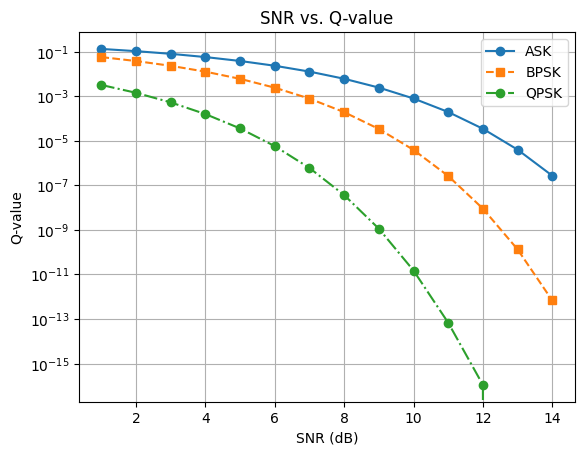

In [9]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

snr_db = np.arange(1, 15, 1)
q_values_ask = []
q_values_bpsk = []
q_values_qpsk = []
for snr_db_value in snr_db:
    snr = 10 ** (snr_db_value * 0.1)
    q_ask = 1 - norm.cdf(np.sqrt(snr))
    q_bpsk = 1 - norm.cdf(np.sqrt(2 * snr))
    q_qpsk = 1 - (2*norm.cdf(np.sqrt(2*snr)) - (norm.cdf(np.sqrt(2*snr)))**2)
    q_values_ask.append(q_ask)
    q_values_bpsk.append(q_bpsk)
    q_values_qpsk.append(q_qpsk)

plt.figure()
plt.semilogy(snr_db, q_values_ask, marker='o', linestyle='-', label='ASK')
plt.semilogy(snr_db, q_values_bpsk, marker='s', linestyle='--', label='BPSK')
plt.semilogy(snr_db, q_values_qpsk, marker='o', linestyle='-.', label='QPSK')
plt.title('SNR vs. Q-value')
plt.xlabel('SNR (dB)')
plt.ylabel('Q-value')
plt.grid(True)
plt.legend()
plt.show()

